In [1]:
import os, sys, time
import cv2
import numpy as np
import pandas as pd
import glob
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
from PIL import Image
from datetime import timedelta

%matplotlib inline
import matplotlib.pyplot as plt

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [2]:
from blazeface import BlazeFace
facedet = BlazeFace().to(device)
facedet.load_weights("blazeface-pytorch/blazeface.pth")
facedet.load_anchors("blazeface-pytorch/anchors.npy")
_ = facedet.train(False)

In [3]:
from read_video_1 import VideoReader
from face_extract_1 import FaceExtractor

FRAMES_PER_VIDEO = 10

video_reader = VideoReader()
video_read_fn = lambda x: video_reader.read_frames(x, num_frames=FRAMES_PER_VIDEO)
face_extractor = FaceExtractor(video_read_fn, facedet)

In [4]:
def mkdir(path):
    if not os.path.isdir(path):
        os.makedirs(path)
    else:
        pass

In [5]:
def predict_on_video(video_path):
    # Find the faces for N frames in the video.
    faces = face_extractor.process_video(video_path)

    # Only look at one face per frame.
    face_extractor.keep_only_best_face(faces)
        
    return faces

In [6]:
filenames = glob.glob('data/videos/*.mp4')

In [7]:
INPUT_SIZE = 224

In [8]:
FACES_PATH = '/home/jupyter/faces_saved/'

In [9]:
len(filenames)

119146

### example

In [8]:
filenames[0]

'data/videos/wqeaqhefve.mp4'

In [9]:
faces = predict_on_video('data/videos/wqeaqhefve.mp4')

In [10]:
faces[0].keys()

dict_keys(['video_idx', 'frame_w', 'frame_idx', 'faces', 'frame_h', 'scores'])

In [11]:
faces[0]['faces'][0].shape

(416, 364, 3)

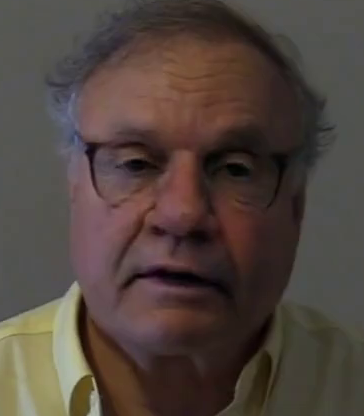

In [12]:
Image.fromarray(faces[0]['faces'][0], 'RGB')

In [14]:
os.path.join(FACES_PATH, os.path.splitext(os.path.basename(filenames[0]))[0])

'/home/jupyter/faces_saved/wqeaqhefve'

### main script

In [10]:
from concurrent.futures import ThreadPoolExecutor

def predict_on_video_set(filenames, start_time=time.time(), num_workers=8):
    def process_file(i):
        file = filenames[i]
        output_dir = os.path.join(FACES_PATH, os.path.splitext(os.path.basename(file))[0])
        mkdir(output_dir)
        faces = predict_on_video(file)
        for face in faces:
            if len(face['faces']) == 1:
                output_file = 'face_{}.png'.format(face['frame_idx'])
                img = cv2.resize(face['faces'][0], (INPUT_SIZE, INPUT_SIZE))
                img = Image.fromarray(img, 'RGB')
                img.save(os.path.join(output_dir, output_file))
        if i % 240 == 0:
            print('{}/{} ({:.6f}%) passed ({} / {})'.format(
                i,
                len(filenames),
                i / len(filenames) * 100,
                timedelta(seconds=time.time() - start_time),
                timedelta(seconds=time.time() - start_time) / i * len(filenames)
            ))

    with ThreadPoolExecutor(max_workers=num_workers) as ex:
        ex.map(process_file, range(len(filenames)))

In [ ]:
predict_on_video_set(filenames, num_workers=4)

Error grabbing frame 283 from movie data/videos/ehtbcrzwed.mp4
Error grabbing frame 278 from movie data/videos/ymqadbkafj.mp4
Error grabbing frame 283 from movie data/videos/kdioikogxu.mp4
Error grabbing frame 283 from movie data/videos/cfxypsulos.mp4
Error grabbing frame 284 from movie data/videos/bclnjhoqol.mp4
Error grabbing frame 283 from movie data/videos/klspkxerhf.mp4
240/119146 (0.201434%) passed (0:02:07.638353 / 17:36:05.059742)
Error grabbing frame 283 from movie data/videos/xubgdudrva.mp4
Error grabbing frame 283 from movie data/videos/ftsgwzxvcm.mp4
Error grabbing frame 283 from movie data/videos/gvdqdduzkm.mp4
Error grabbing frame 119 from movie data/videos/gufhvkutxh.mp4
Error grabbing frame 283 from movie data/videos/trdmmncyhp.mp4
Error grabbing frame 283 from movie data/videos/okiesquksn.mp4
Error grabbing frame 283 from movie data/videos/ggwmjfhixc.mp4
Error grabbing frame 283 from movie data/videos/obubkmtiff.mp4
480/119146 (0.402867%) passed (0:04:08.047256 / 17:06

Error grabbing frame 283 from movie data/videos/tfeguxahut.mp4
Error grabbing frame 283 from movie data/videos/vjiiikrtva.mp4
Error grabbing frame 283 from movie data/videos/kbasecegsw.mp4
3360/119146 (2.820069%) passed (0:28:38.641271 / 16:55:43.179000)
Error grabbing frame 283 from movie data/videos/penimmldnu.mp4
Error grabbing frame 283 from movie data/videos/mjoafcwkac.mp4
Error grabbing frame 283 from movie data/videos/rpsttrnmql.mp4
Error grabbing frame 284 from movie data/videos/nsuxqkbstm.mp4
Error grabbing frame 284 from movie data/videos/yeasrhspcl.mp4
Error grabbing frame 283 from movie data/videos/mprbuwqpyh.mp4
Error grabbing frame 283 from movie data/videos/xhotkjyjqd.mp4
Error grabbing frame 283 from movie data/videos/rlvsrjqfey.mp4
Error grabbing frame 283 from movie data/videos/bxcmqokvfk.mp4
Error grabbing frame 283 from movie data/videos/lqywpbeiwo.mp4
Error grabbing frame 283 from movie data/videos/azdwparxng.mp4
Error grabbing frame 283 from movie data/videos/situ

Error grabbing frame 283 from movie data/videos/mshfuaygyq.mp4
Error grabbing frame 283 from movie data/videos/rrfkxcvqvn.mp4
Error grabbing frame 283 from movie data/videos/suurdgtysl.mp4
Error grabbing frame 283 from movie data/videos/rursrvigxm.mp4
Error grabbing frame 283 from movie data/videos/roivdutkrz.mp4
Error grabbing frame 222 from movie data/videos/jsdonkriyw.mp4
Error grabbing frame 283 from movie data/videos/rbufvipinj.mp4
Error grabbing frame 283 from movie data/videos/fdrizqnsqt.mp4
6480/119146 (5.438705%) passed (0:55:01.031172 / 16:51:35.117028)
Error grabbing frame 283 from movie data/videos/jjgtlwcvcd.mp4
Error grabbing frame 283 from movie data/videos/eusxhfybrd.mp4
Error grabbing frame 283 from movie data/videos/exnxonosso.mp4
Error grabbing frame 283 from movie data/videos/hmchxsdorm.mp4
Error grabbing frame 283 from movie data/videos/npbcodcrvo.mp4
Error grabbing frame 283 from movie data/videos/aoxltdxgll.mp4
Error grabbing frame 283 from movie data/videos/qfby

Error grabbing frame 283 from movie data/videos/mcbxztarfp.mp4
Error grabbing frame 283 from movie data/videos/bwocxfcknz.mp4
Error grabbing frame 283 from movie data/videos/tjjbchgfgp.mp4
Error grabbing frame 283 from movie data/videos/nyghtjodio.mp4
Error grabbing frame 283 from movie data/videos/wncuhzhgjv.mp4
Error grabbing frame 283 from movie data/videos/vtjidnmwxh.mp4
9360/119146 (7.855908%) passed (1:19:24.888410 / 16:50:53.535074)
Error grabbing frame 283 from movie data/videos/iwbsozjcfr.mp4
Error grabbing frame 283 from movie data/videos/qxaywtmmnn.mp4
Error grabbing frame 283 from movie data/videos/dbbefxhmfk.mp4
Error grabbing frame 284 from movie data/videos/wytpaehszj.mp4
Error grabbing frame 283 from movie data/videos/ujcaowotrc.mp4
Error grabbing frame 283 from movie data/videos/wxdhzqpzem.mp4
Error grabbing frame 283 from movie data/videos/mjdbqxbvqt.mp4
Error grabbing frame 283 from movie data/videos/wrllqvmdid.mp4
Error grabbing frame 283 from movie data/videos/sfew